### Setup

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Function to run the analysis

In [2]:
def run_analysis(PATH):
    """
    Perform analysis on Google Trends data stored in a CSV file.

    Parameters:
    - PATH (str): The file path to the CSV file containing Google Trends data.
    
    Returns:
    None

    This function reads a CSV file containing Google Trends data, performs statistical analysis, and generates visualizations
    to provide insights into the trends.

    Usage Example:
    ```
    run_analysis('path/to/your/file.csv')
    ```

    Statistical Analysis:
    ---------------------
    The function starts by loading the data from the specified CSV file using pandas and removes the 'epiweek' column.

    Statistics are then printed using the describe() method, providing a summary of the data distribution.

    Violin Plot:
    ------------
    A violin plot is generated to visualize the distribution of Google Trends values for each city. The plot provides
    insights into the central tendency and spread of the data.

    Time Series Analysis:
    ---------------------
    For each city, time series analysis is performed with a moving average. A window size of 10 is used by default,
    but you can adjust it based on your preferences. The original trend values are plotted alongside a smoothed curve
    obtained by applying a moving average.

    The resulting plots show trends over time, helping to identify patterns and trends in the Google Trends data.

    Note:
    -----
    Ensure that the necessary libraries (pandas, seaborn, and matplotlib) are installed before using this function.

    """
    df = pd.read_csv(PATH).drop(columns='epiweek')
    
    # Statistics:
    print('Statistics: ')
    print(df.describe())
    
    # Violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df.iloc[:, 1:], inner="quartile")
    plt.title('Violin Plot of Google Trends for Each City')
    plt.xlabel('City')
    plt.ylabel('Trend Value')
    plt.show()
    
    df.date = pd.to_datetime(df.date)
    
    
    # Time Series:
    # Plotting with moving average
    window_size = 10  # Adjust the window size for the moving average

    for column in df.columns[1:]:
        if column == 'epiweek':
            continue
        plt.figure(figsize=(10, 6))

        # Plot the original data
        plt.plot(df.date, df[column], label='Original', marker='o')

        # Plot the smoothed data using a moving average
        plt.plot(df.date, df[column].rolling(window=window_size).mean(), label=f'Moving Average (Window Size={window_size})', linestyle='--')

        plt.title(f'Google Trends {column}')
        plt.xlabel('Date')
        plt.ylabel('Trend Value')
        plt.legend()
        plt.grid(True)
        plt.show()

### EDA

In [3]:
PATH = 'Violence.csv'

Statistics: 
         Medellín        Cali      Soacha  Villavicencio       Pasto  \
count  504.000000  504.000000  504.000000     504.000000  504.000000   
mean    58.476190   56.281746   35.386905      39.589286   36.337302   
std     18.231214   17.805666   23.856661      21.448259   19.930129   
min     13.000000    8.000000    0.000000       0.000000    0.000000   
25%     47.000000   43.000000   17.000000      25.000000   24.000000   
50%     62.000000   58.000000   29.000000      41.000000   36.000000   
75%     71.000000   69.000000   55.000000      54.000000   49.000000   
max    100.000000  100.000000  100.000000     100.000000  100.000000   

       Barranquilla  Bucaramanga      Ibagué     Popayán      Cúcuta  
count    504.000000   504.000000  504.000000  504.000000  504.000000  
mean      49.940476    49.468254   50.734127   43.041667   43.478175  
std       18.913332    19.204740   23.108284   24.098214   19.656481  
min        5.000000     0.000000    0.000000    0.0000

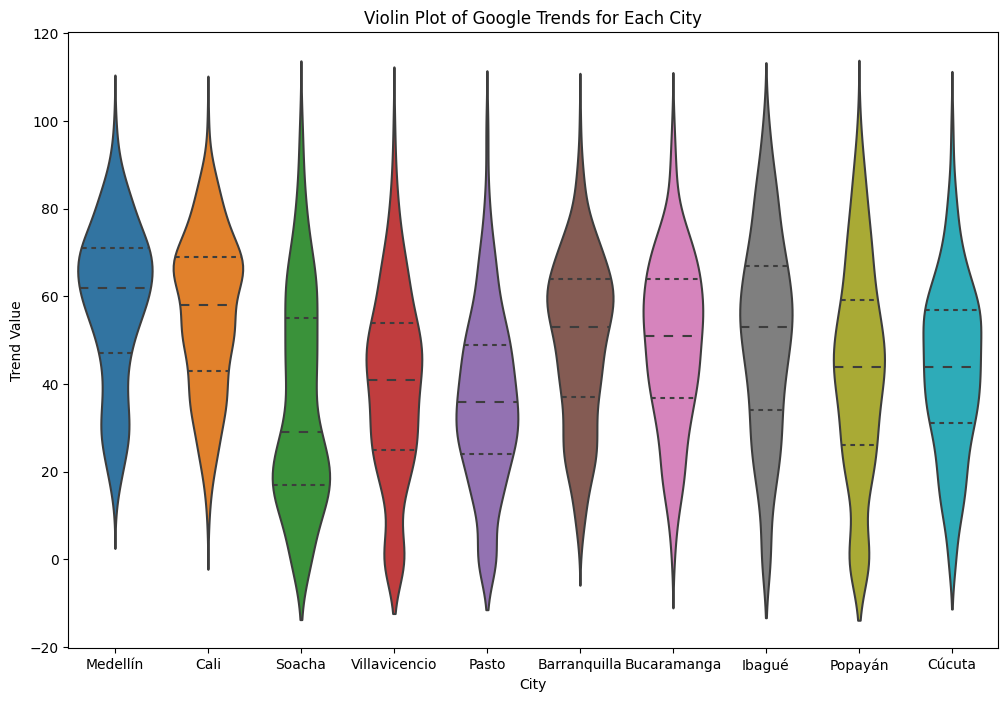

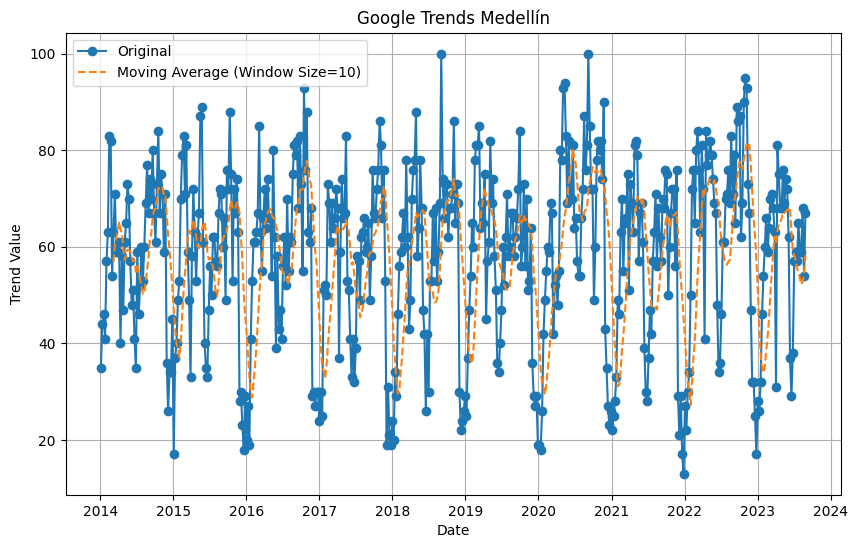

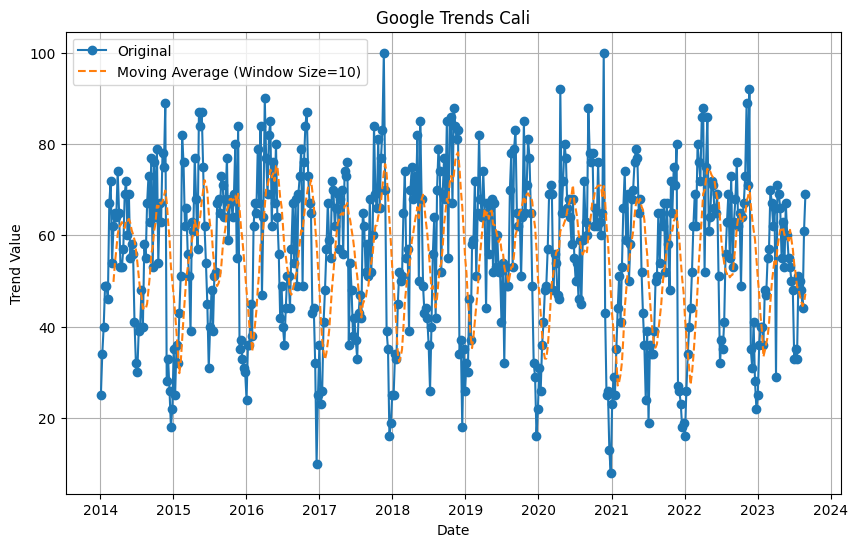

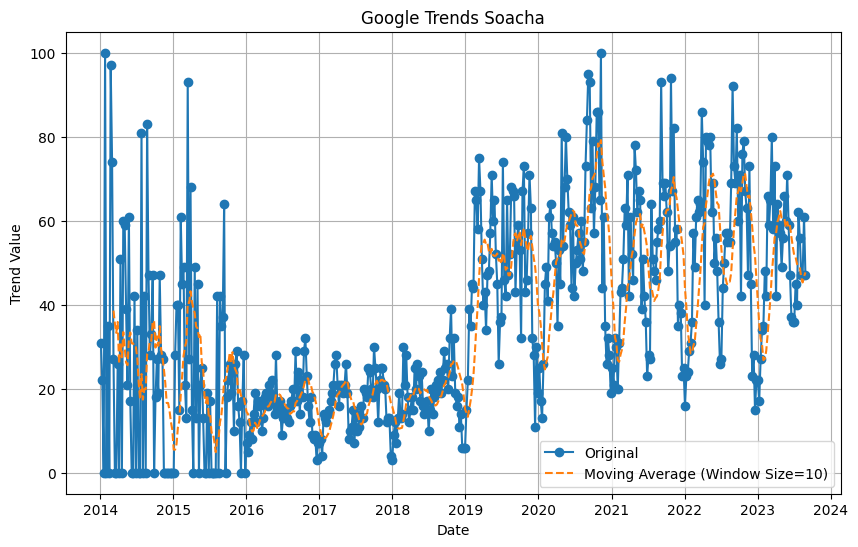

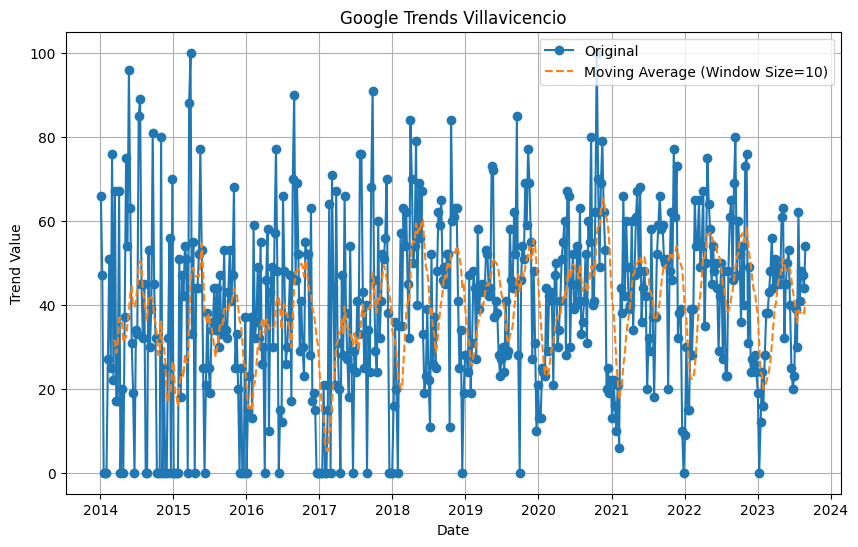

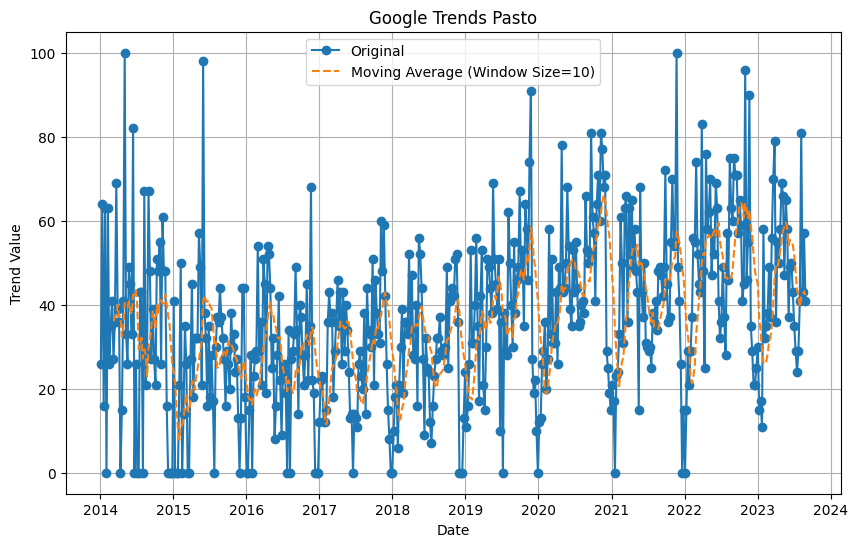

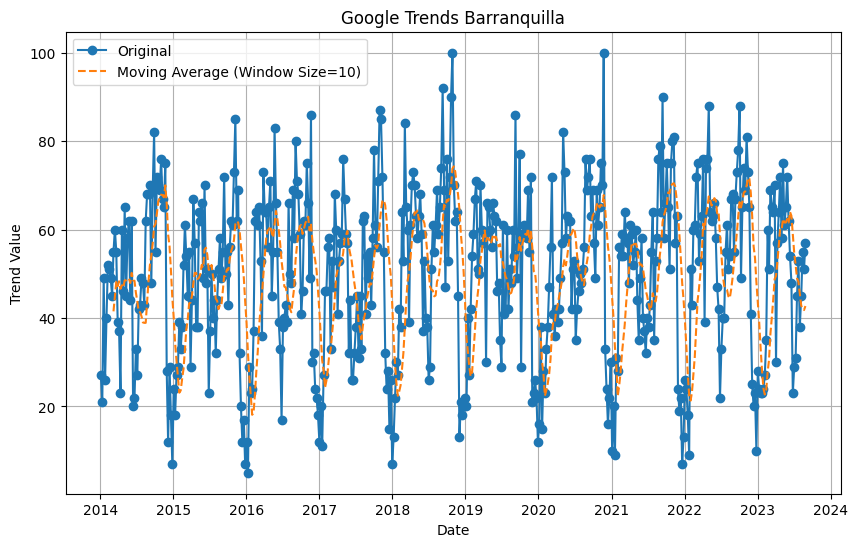

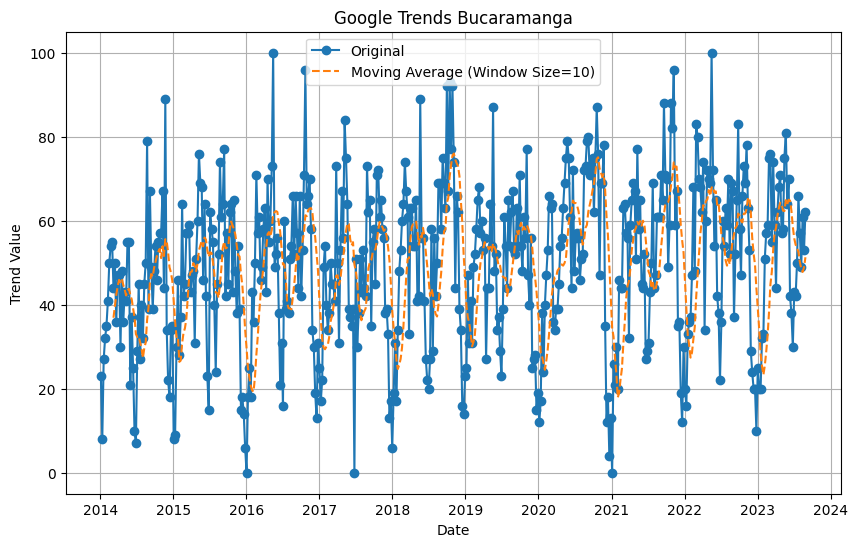

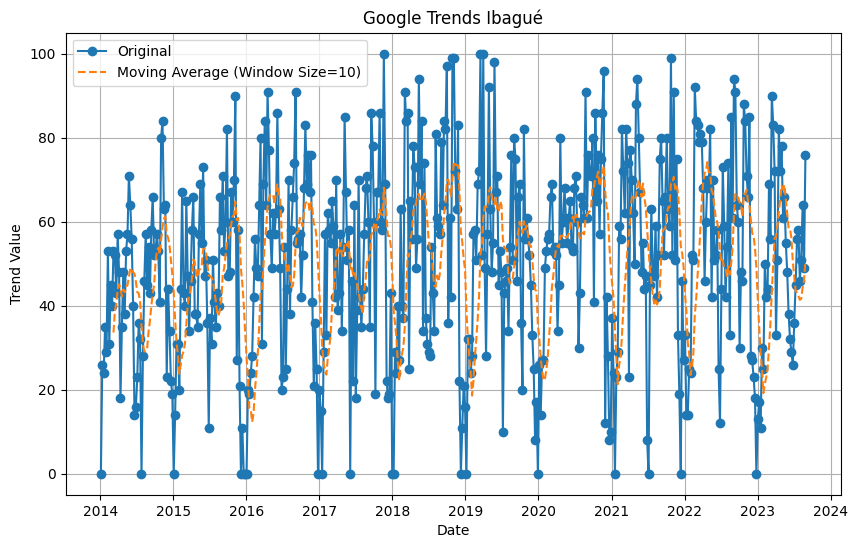

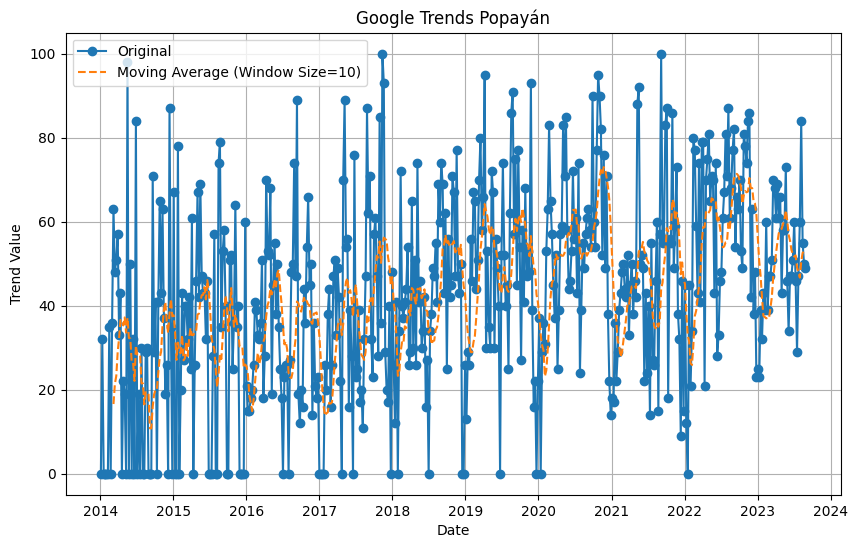

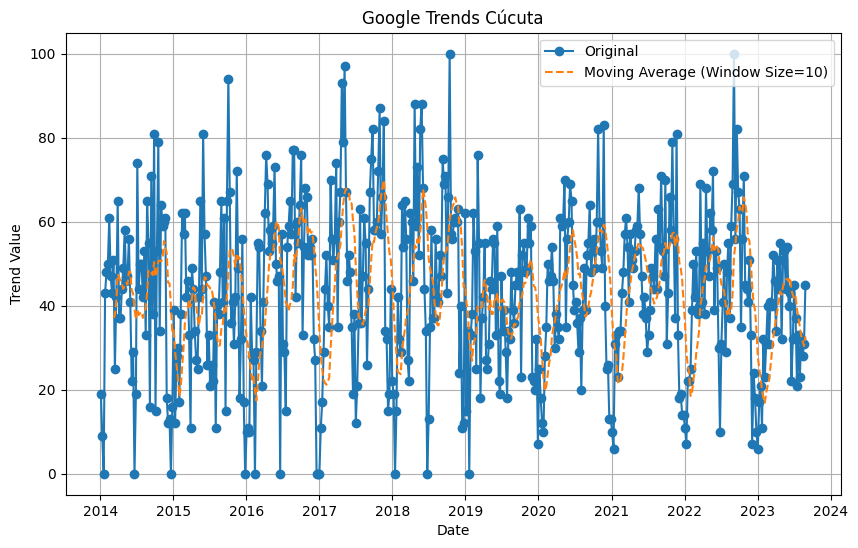

In [4]:
run_analysis(PATH)

Statistics: 
         Medellín        Cali      Soacha  Villavicencio       Pasto  \
count  504.000000  504.000000  504.000000     504.000000  504.000000   
mean    23.811508   20.970238    9.341270       7.763889   10.605159   
std     22.372106   20.420946   15.668617      14.642927   17.717825   
min      0.000000    0.000000    0.000000       0.000000    0.000000   
25%      0.000000    0.000000    0.000000       0.000000    0.000000   
50%     22.000000   20.000000    0.000000       0.000000    0.000000   
75%     37.000000   33.250000   18.000000      13.000000   20.000000   
max    100.000000  100.000000  100.000000     100.000000  100.000000   

       Barranquilla  Bucaramanga      Ibagué     Popayán      Cúcuta  
count    504.000000   504.000000  504.000000  504.000000  504.000000  
mean      15.936508    12.628968   12.803571    8.978175   12.365079  
std       19.623391    17.598663   20.791187   16.464478   18.123325  
min        0.000000     0.000000    0.000000    0.0000

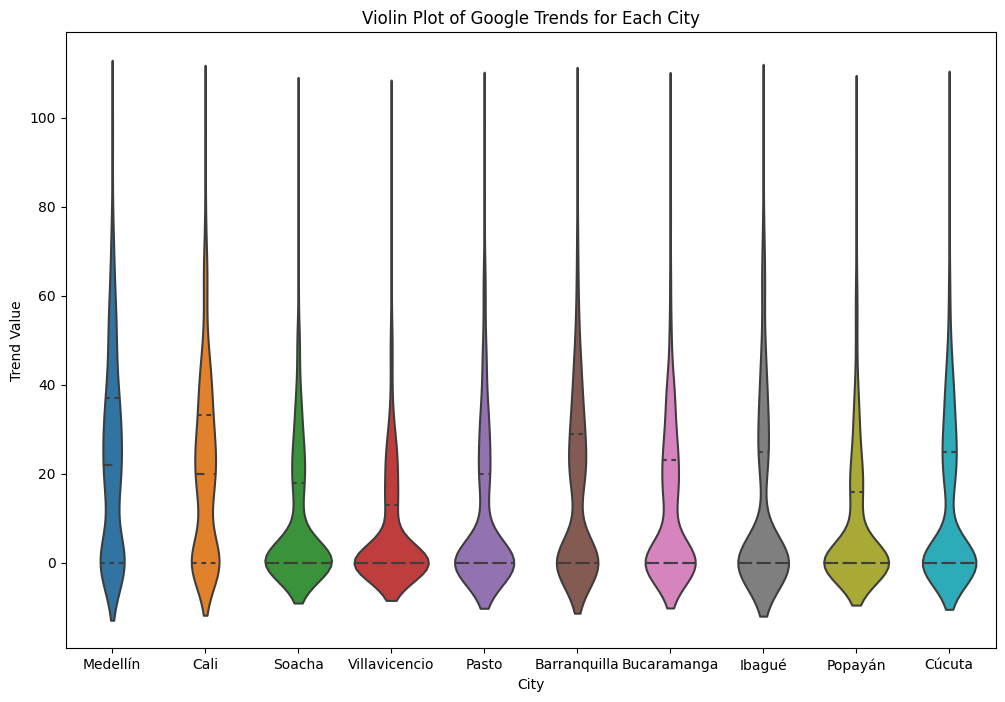

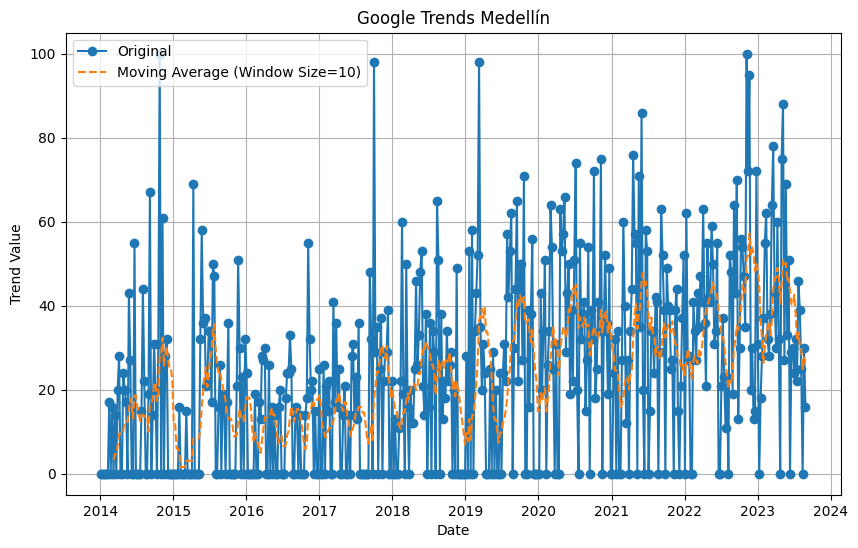

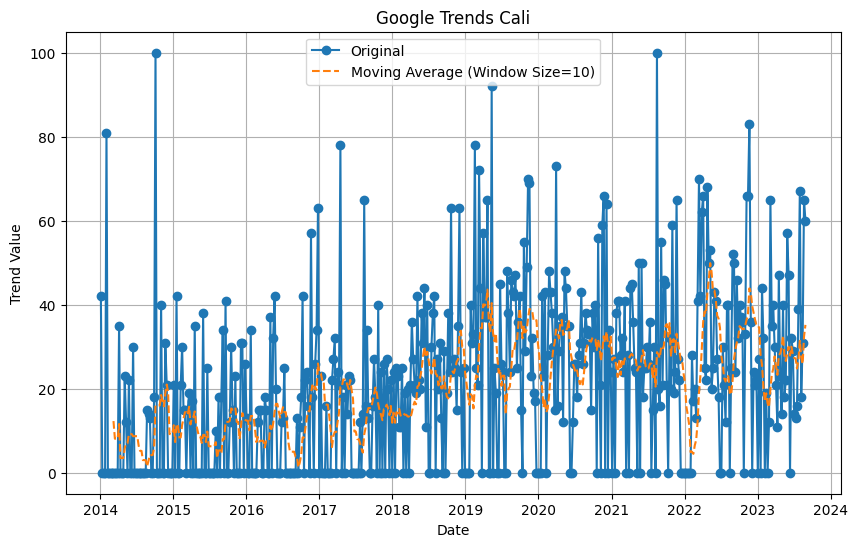

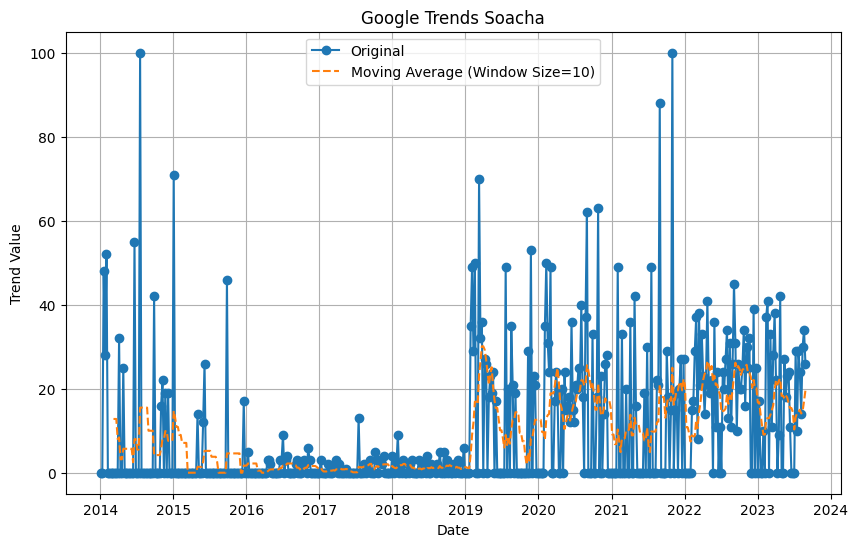

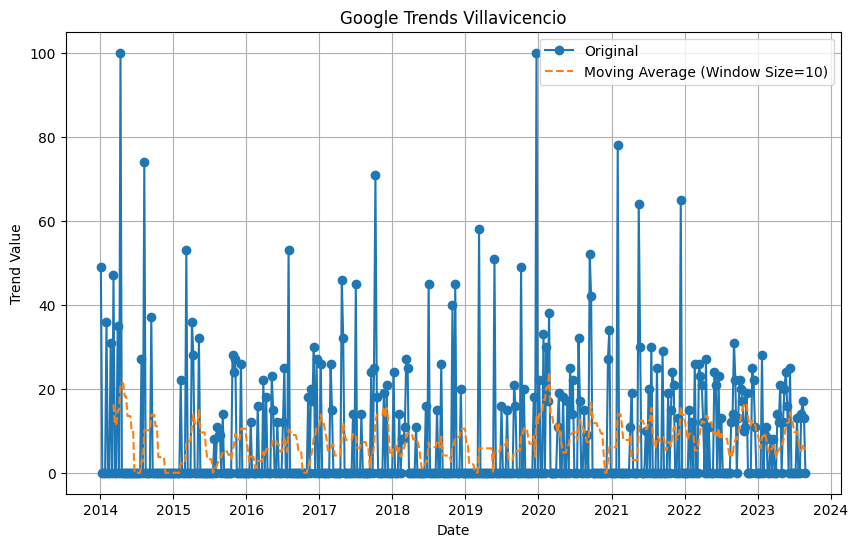

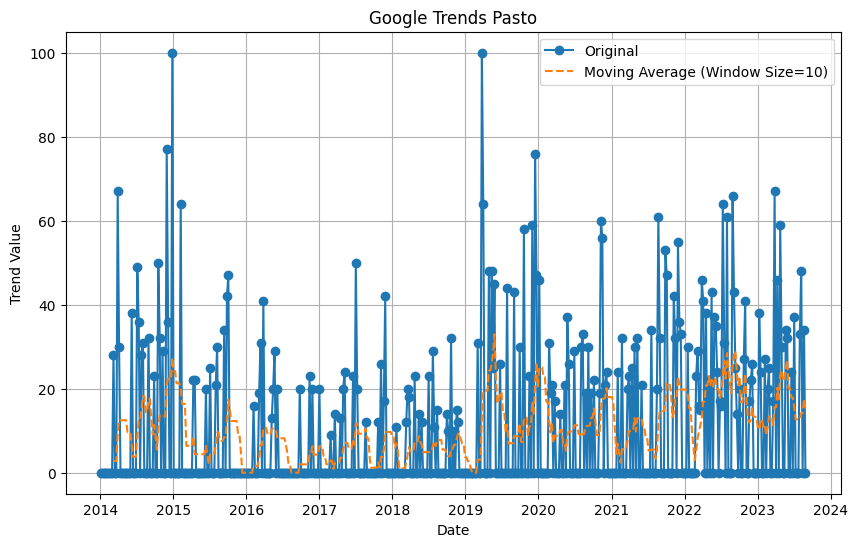

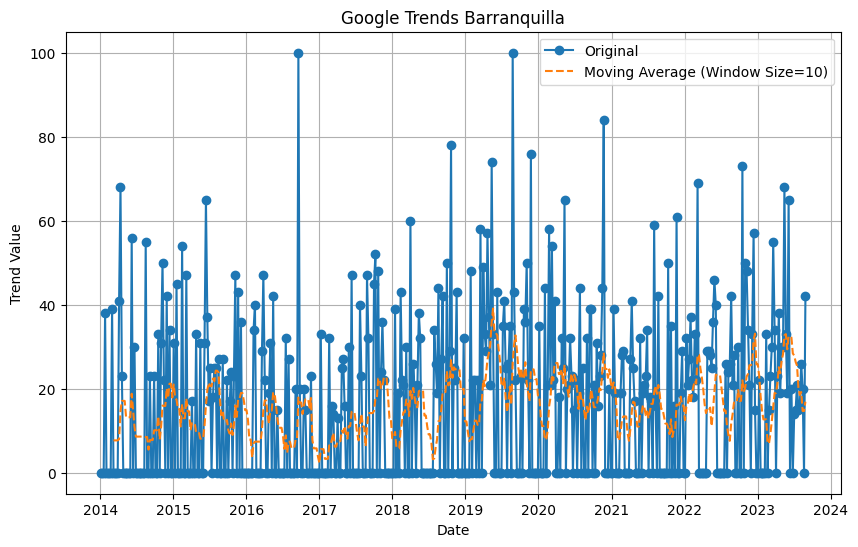

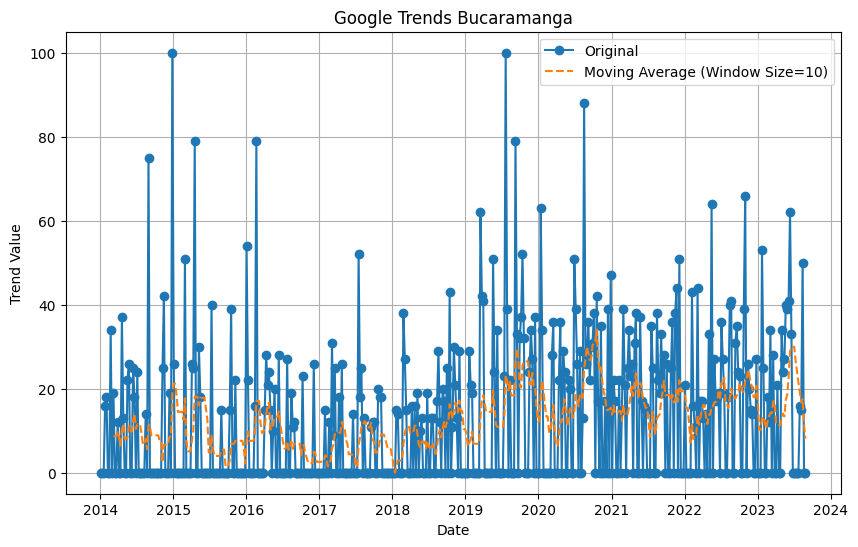

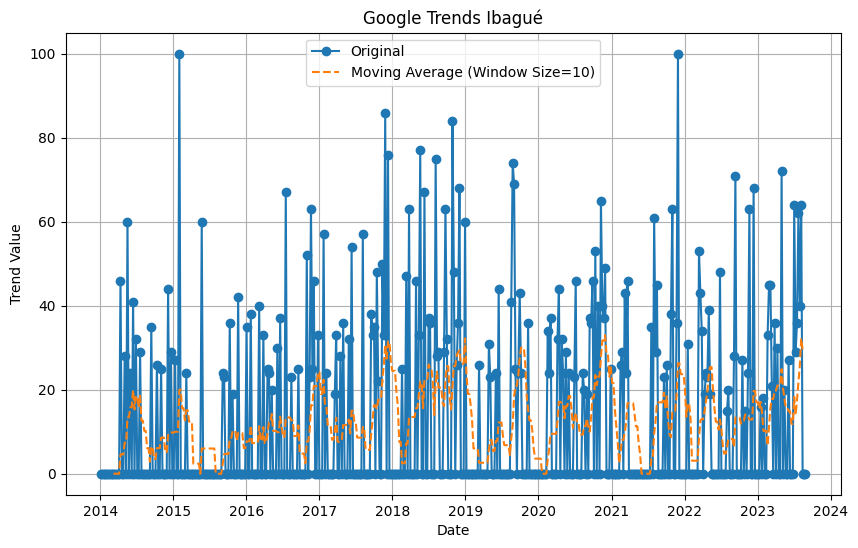

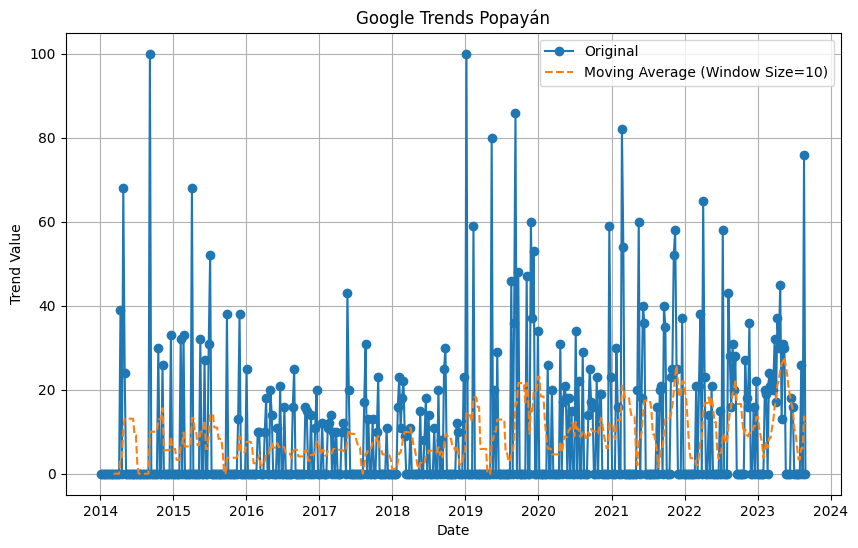

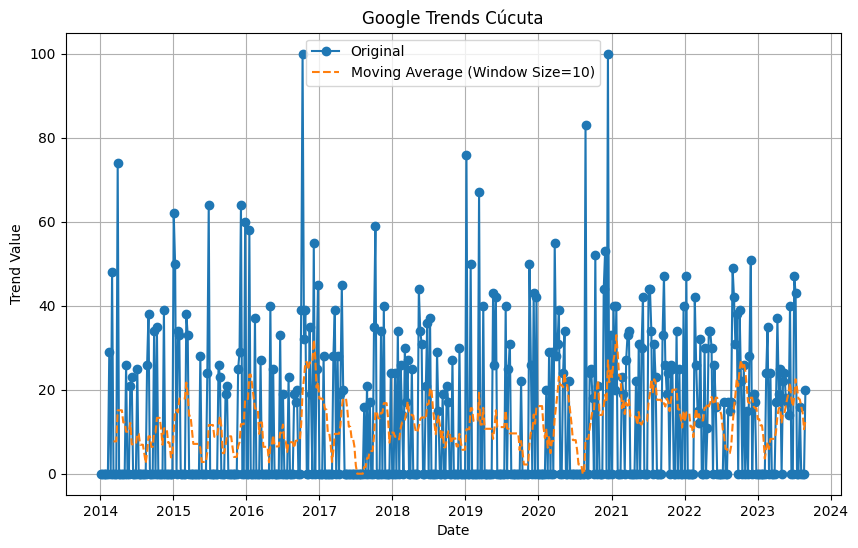

In [5]:
PATH = 'violencia de genero.csv'
run_analysis(PATH)